In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [3]:
df = pd.read_csv(r'C:\Users\varre\OneDrive\Desktop\D.A\Portfolio\project4pythonD.correlation\movies.csv')

In [4]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [6]:
#how=all will drop only if everythign is null in the row 
df = df.dropna(how='any',axis=0)    


In [7]:
for col in df.columns:
    percnt_missing = np.mean(df[col].isnull())
    print('{} - {} %'.format(col,percnt_missing))

name - 0.0 %
rating - 0.0 %
genre - 0.0 %
year - 0.0 %
released - 0.0 %
score - 0.0 %
votes - 0.0 %
director - 0.0 %
writer - 0.0 %
star - 0.0 %
country - 0.0 %
budget - 0.0 %
gross - 0.0 %
company - 0.0 %
runtime - 0.0 %


In [8]:
# converting dtypes of budget n gross into int

df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [9]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [10]:
#df['year_corrected']=df['released'].str.split('()').str[1]
df['year_corrected']=df['released'].str.split('(').str[0]


In [11]:
df['year_corrected']=df['year_corrected'].str.split(',').str[1]

In [16]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime year_corrected  
0   46998772        Warner Bros.    146.0          1980   
1   58853106   Columbia Pictures    104.0          1980   
2  538375067           Lucasfilm    124.0          1980   
3   83453539  Paramount Pictures     88.0          1980   
4   39846344      Orion Pictures     98.0          1980

In [17]:
# so far data we need is clear and duplicates here can be expected as same company can produce more films 


df.sort_values(by =['gross'],ascending=False,inplace = False)

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
5640                                 Tanner Hall          R   Drama  2009   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score      votes  \
5445  December 18, 2009 (United States)    7.8  1100000.0   
7445     April 26, 2019 (United States)    8.4   903000.0   
3045  December 19, 1997 (United States)    7.8  1100000.0   
6663  December 18, 2015 (United States)    7.8   876000.0   
7244     April 27, 2018 (United States)    8.4   897000.0   
...                                 ...    ...        ...   
5640          January 15, 2015 (Sweden)    5.8     3500.0   
2434         June 4, 1994 (South Korea)    4.5     1900.0   
3681              May 11, 2001 (Canada)    6.8    43000.0   
272      March 12, 1982 (United States)    3.9     2300.0   
3203           October 1, 1997 (Brazil)    5.7     5800.0   

                 director                   writer               star  \
5445        James Cameron            James Cameron    Sam Worthington   
7445        Anthony Russo       Christopher Markus  Robert Downey Jr.   
3045        James Cameron            James Cameron  Leonardo DiCaprio   
6663          J.J. Abrams          Lawrence Kasdan       Daisy Ridley   
7244        Anthony Russo       Christopher Markus  Robert Downey Jr.   
...                   ...                      ...                ...   
5640  Francesca Gregorini  Tatiana von Fürstenberg        Rooney Mara   
2434     Stephen Cornwell       Wallace C. Bennett       Brad Johnson   
3681         John Fawcett             Karen Walton      Emily Perkins   
272          Charles Band            Alan J. Adler    Robert Glaudini   
3203         George Huang                Andy Burg       Will Friedle   

            country     budget       gross                    company  \
5445  United States  237000000  2847246203      Twentieth Century Fox   
7445  United States  356000000  2797501328             Marvel Studios   
3045  United States  200000000  2201647264      Twentieth Century Fox   
6663  United States  245000000  2069521700                  Lucasfilm   
7244  United States  321000000  2048359754             Marvel Studios   
...             ...        ...         ...                        ...   
5640  United States    3000000        5073           Two Prong Lesson   
2434  United States    5000000        2970           Trimark Pictures   
3681         Canada    5000000        2554  Copperheart Entertainment   
272   United States     800000        2270           Embassy Pictures   
3203  United States   15000000         309                   Daybreak   

      runtime year_corrected  
5445    162.0          2009   
7445    181.0          2019   
3045    194.0          1997   
6663    138.0          2015   
7244    149.0          2018   
...       ...            ...  
5640     96.0          2015   
2434     97.0          1994   
3681    108.0          2001   
272      85.0          1982   
3203     85.0          1997   

[5421 rows x 16 columns]

In [19]:
# since there are only few rows visible, we cans et_option to display all rows  

# mistake is I have done it for daframe but pandas itself need to be corrected

pd.set_option('display.max_rows',None)

In [49]:

df_sorted = df.sort_values(by =['budget'],ascending=False,inplace = False)
df_sorted.head()

name rating   genre  year  \
7445                         Avengers: Endgame  PG-13  Action  2019   
7244                    Avengers: Infinity War  PG-13  Action  2018   
7075   Star Wars: Episode VIII - The Last Jedi  PG-13  Action  2017   
7066                            Justice League  PG-13  Action  2017   
5060  Pirates of the Caribbean: at World's End  PG-13  Action  2007   

                               released  score     votes        director  \
7445     April 26, 2019 (United States)    8.4  903000.0   Anthony Russo   
7244     April 27, 2018 (United States)    8.4  897000.0   Anthony Russo   
7075  December 15, 2017 (United States)    7.0  581000.0    Rian Johnson   
7066  November 17, 2017 (United States)    6.1  418000.0     Zack Snyder   
5060       May 25, 2007 (United States)    7.1  608000.0  Gore Verbinski   

                  writer               star        country     budget  \
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7075        Rian Johnson       Daisy Ridley  United States  317000000   
7066        Jerry Siegel        Ben Affleck  United States  300000000   
5060         Ted Elliott        Johnny Depp  United States  300000000   

           gross               company  runtime year_corrected  
7445  2797501328        Marvel Studios    181.0          2019   
7244  2048359754        Marvel Studios    149.0          2018   
7075  1332698830  Walt Disney Pictures    152.0          2017   
7066   657926987          Warner Bros.    120.0          2017   
5060   960996492  Walt Disney Pictures    169.0          2007

In [30]:
# currently there is no need to delete the duplicates but , if we want , then the below steps are for that .

# to make sure what are values having duplicates , we use the below syntax
#df['company'].drop_duplicates().sort_values(ascending=True) 

# to drop the duplicates, we use this syntax

#df['company']= df['company'].drop_duplicates().sort_values(ascending=True)  

# if all duplicates of dataframe need to be removed

#df.drop_duplicates()

4345                      "DIA" Productions GmbH & Co. KG
7525                  "Weathering With You" Film Partners
3024                                      .406 Production
2929                                        1492 Pictures
3525                                        1492 Pictures
385                                      1818 Productions
4412                                     19 Entertainment
7109                                           1978 Films
6517                     1984 Private Defense Contractors
4151                                         2 Loop Films
7489                                    2.0 Entertainment
5195                                         2.4.7. Films
4559                                     2003 Productions
7651                                 20th Century Studios
6528                                21 Laps Entertainment
7353                                21 Laps Entertainment
1700                        21st Century Film Corporation
2584          

[]

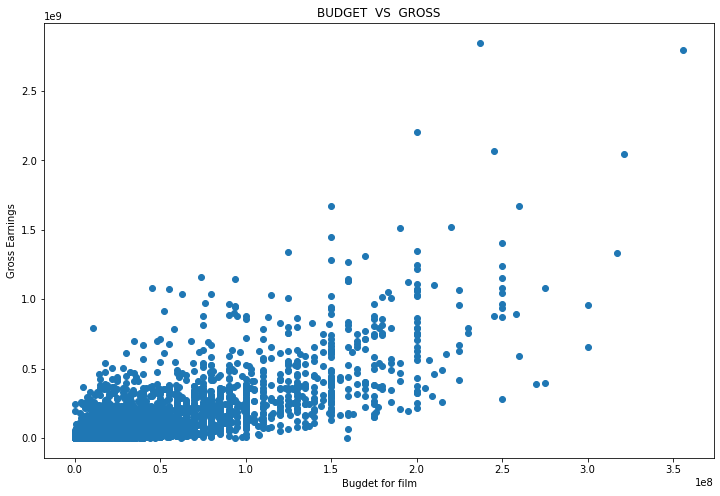

In [40]:
# so ,in general we can normalise the information , if we can find data with alsmost same name but here it is different as few companies 
# might have similar name but all of them are of different period , so we need to keep them like that.

# making hypothesis that budget and company might be the ones more corrleated and affect the gross'

#since budget and gross are numerical data . we can use scatter plot as well as linear regression 

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('BUDGET  VS  GROSS')
plt.xlabel('Bugdet for film')
plt.ylabel('Gross Earnings')
plt.plot()



<AxesSubplot:xlabel='budget', ylabel='gross'>

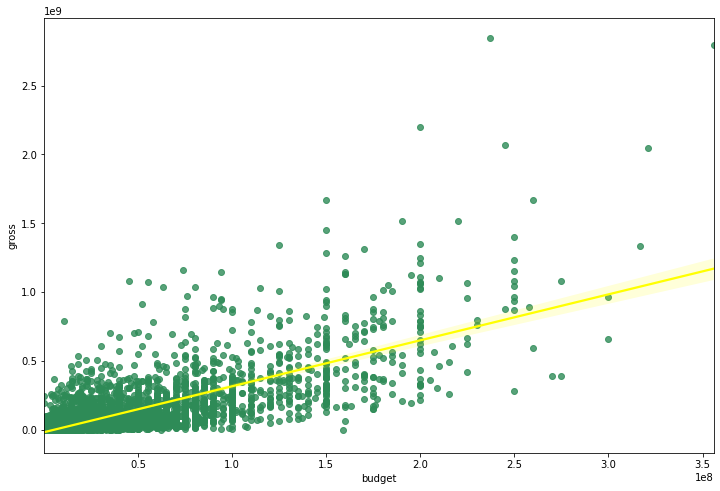

In [51]:
# regression plot using seaborn  

sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'seagreen'},line_kws={'color':'yellow'})


In [57]:
# this shows good correlation between gross and budget 

#df.corrwith(df['gross'])     , if we want only with one column 

df.corr()         #person, kendall, spearman

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

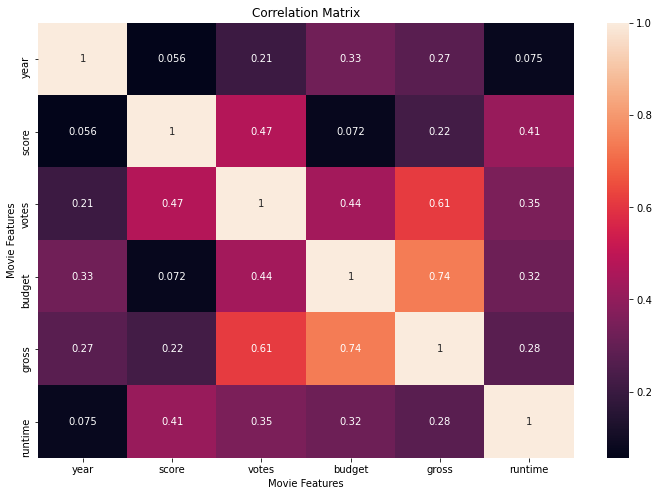

In [60]:
# the above all columns are numeric and votes, budget have high impact , but we want to check with other object type columns also 

# before that we would make a heatmap for the correlated matrix

cor_mat = df.corr()

sns.heatmap(cor_mat,annot=True)

plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


plt.show()

In [62]:
df_numerzd =df

for col in df_numerzd.columns:
    if (df_numerzd[col].dtype == 'object'):
        df_numerzd[col]=df_numerzd[col].astype('category')
        df_numerzd[col]=df_numerzd[col].cat.codes
        

# to give unique numbers to object  we give cat.codes  
df_numerzd 
        

name  rating  genre  year  released  score      votes  director  writer  \
0     4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1     3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2     3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3      204       4      4  1980      1127    7.7   221000.0       889    1413   
4      732       6      4  1980      1170    7.3   108000.0       719     351   
5     1509       6      9  1980      1922    6.4   123000.0      1758    3081   
6     3930       6      0  1980      1359    7.9   188000.0       974     576   
7     3122       6      3  1980       530    8.2   330000.0      1269    1257   
8     3732       4      0  1980      1346    6.8   101000.0      1606    1402   
9     4401       6      3  1980      1755    7.0    10000.0      2011     280   
10     332       4      0  1980       510    6.1    18000.0       236    2810   
11    4179       4      1  1980      2272    7.3    54000.0       817    1300   
12    3029       4      1  1980       471    5.3    30000.0      1643    1658   
13    2859       6      6  1980      2416    7.7    49000.0      1666    1653   
14    1208       6      5  1980      1170    7.1    37000.0       207     350   
15    3553       4      6  1980      2294    7.2    27000.0       847    2507   
17      66       4      4  1980       530    6.9    29000.0       333    2315   
18    4143       6      9  1980       832    6.8    66000.0       943    1486   
20     986       6      5  1980       714    6.5    20000.0      2032    3151   
21    1762       6      1  1980       117    6.8    14000.0      1307    2065   
22    4128       4      0  1980       213    6.7    22000.0       502    2959   
23    5289       4      8  1980       437    5.3    12000.0      1654    2492   
28     700       6      5  1980      1359    7.2    17000.0      1870    3099   
29     261       6      5  1980       667    6.2    22000.0      1489    2358   
33     785       4      6  1980       117    6.1      604.0      1146     673   
35    3068       6      4  1980      2156    6.2    24000.0       744    2207   
36    4245       6      4  1980      1883    6.3     4300.0       581     966   
37    2618       6      4  1980      2257    6.0    11000.0      1116    2578   
42    4736       6      0  1980      1413    7.1     9000.0      1613    1802   
46    4312       6      0  1980      1304    5.3     3900.0      1337    2383   
48    4512       4      0  1980      1922    5.1     3100.0       329    2036   
50    3648       4      4  1980      2476    7.3    22000.0      2043    3184   
51    2497       6      4  1980      2416    6.8     4500.0      1025     303   
53     692       4      0  1980      1289    6.1    11000.0       327     768   
56    5193       4      0  1980      1629    4.6     2600.0       793    1078   
57    2818       4      4  1980      1051    5.4     2400.0       914    2623   
58    4519       6      0  1980       261    5.1     5200.0       551    1819   
75    4351       1      1  1980      1399    5.8     1300.0       267     939   
77    5240       6      4  1980       261    5.9      415.0      1484    1339   
80    2971       6      6  1980      2551    4.0      546.0       969    1014   
92    1973       4      0  1981      1296    8.4   905000.0      1859    1806   
94     284       6      4  1981       314    7.5    97000.0       974    1524   
95    1301       6      0  1981      1040    7.2   131000.0       943    1486   
96    4100       2      9  1981        46    7.5   192000.0      1735    2707   
97    3031       6      4  1981      1568    6.2    40000.0       177     307   
98     603       6      5  1981      1162    7.4    47000.0       207     350   
99     861       4      0  1981      1296    6.9    42000.0       478     277   
100   1329       6      1  1981        11    7.4    59000.0       937    2963   
101   2389       6      0  1981      

In [63]:
df.corr()

name    rating     genre      year  released     score  \
name            1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating         -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre           0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year            0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released       -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score           0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes           0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director        0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer          0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star           -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country        -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget          0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross           0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company         0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime         0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   
year_corrected  0.026759  0.019560 -0.070699  0.996723 -0.005141  0.062648   

                   votes  director    writer      star   country    budget  \
name            0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating          0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre          -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year            0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released        0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score           0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes           1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director       -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer         -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star           -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country         0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget          0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross           0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company         0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime         0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   
year_corrected  0.204183 -0.035738 -0.023603 -0.030840 -0.072407  0.321624   

                   gross   company   runtime  year_corrected  
name            0.005639  0.021697  0.010850        0.026759  
rating         -0.181906 -0.092357  0.140792        0.019560  
genre          -0.244101 -0.071334 -0.059237       -0.070699  
year            0.274321 -0.014333  0.075077        0.996723  
released        0.008501 -0.002407  0.008975       -0.005141  
score           0.222556  0.020656  0.414068        0.062648  
votes           0.614751  0.118470  0.352303        0.204183  
director       -0.029560 -0.008223  0.017433       -0.035738  
writer         -0.035885 -0.003697 -0.017561       -0.023603  
star           -0.000004  0.014082  0.010108       -0.030840  
country         0.060078  0.048569 -0.034477       -0.072407  
budget          0.740247  0.170235  0.318695        0.321624  
gross           1.000000  0.149553  0.275796        0.269479  
company         0.149553  1.000000  0.037585       -0.015587  
runtime         0.275796  0.037585  1.000000        0.076666  
year_corrected  0.269479 -0.015587  0.076666        1.000000

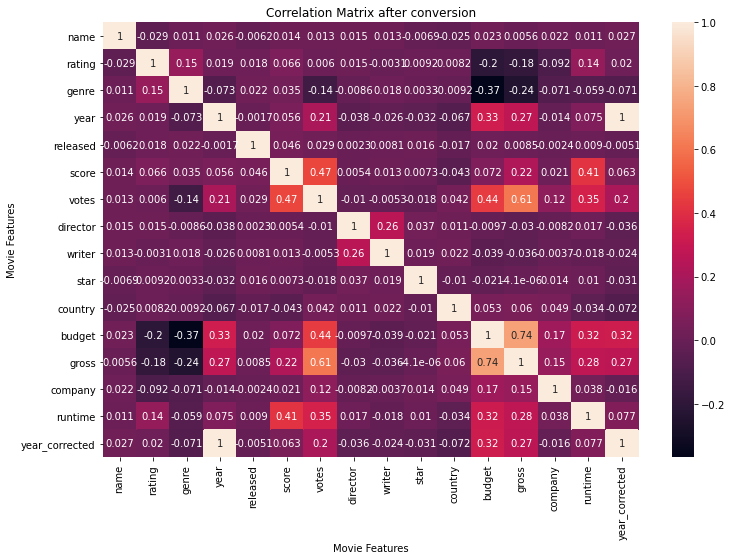

In [65]:
new_mat  = df.corr()

sns.heatmap(new_mat,annot=True)
plt.title('Correlation Matrix after conversion')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [74]:
# we can draw correaltion only for gross with respect to othe movie features 
final_corr = df.corrwith(df['gross'])


final_corr

name              0.005639
rating           -0.181906
genre            -0.244101
year              0.274321
released          0.008501
score             0.222556
votes             0.614751
director         -0.029560
writer           -0.035885
star             -0.000004
country           0.060078
budget            0.740247
gross             1.000000
company           0.149553
runtime           0.275796
year_corrected    0.269479
dtype: float64

In [ ]:
# so, instead of Company and Budget , the most correlated ones are Budget and Votes 